In [23]:
import pandas as pd
import numpy as np
df=pd.read_csv("Titanic-Dataset.csv",header='infer')

print(df.head(7))
print(df.shape)
print(df.info())


df4=df.copy()
df5=df.copy()




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN

In [24]:
meanage=np.mean(df.loc[~df["Age"].isna(),"Age"])
print(meanage)
df4.loc[df["Age"].isna(),"Age"]=meanage
print(df4.info())

# replacing na in cabin with most frequent value in cabin
# first find the value in cabin
mfcabin=df["Cabin"].mode()[0]
print(mfcabin)
df4.loc[df["Cabin"].isna(),"Cabin"]=mfcabin
print(df4.info())

#replacing NA in embarked with most frequent value in embarked 
#first find the most frequent value
mfembarked=df.loc[:,"Embarked"].mode()[0]
df4.loc[df["Embarked"].isna(), "Embarked"] = mfembarked
#checking
print(mfembarked)

meanage0=np.mean(df.loc[(~df["Age"].isna())&(df["Survived"]==0),"Age"].values)
meanage1=np.mean(df.loc[(~df["Age"].isna())&(df["Survived"]==1),"Age"].values)
print(meanage0)
print(meanage1)
df5.loc[df["Age"].isna()&df["Survived"]==0,"Age"]=meanage0
df5.loc[df["Age"].isna()&df["Survived"]==1,"Age"]=meanage1
print(df5.info())

mfcabin0=df.loc[df["Survived"]==0,"Cabin"].mode()[0]
mfcabin1=df.loc[df["Survived"]==1,"Cabin"].mode()[0]
print(mfcabin0)
print(mfcabin1)
df5.loc[df["Cabin"].isna() & df["Cabin"]==0,"Cabin"]=mfcabin0
df5.loc[df["Cabin"].isna() & df["Cabin"]==1,"Cabin"]=mfcabin1
print(df5.info())

mfembarked0=df.loc[df["Survived"]==0,"Embarked"].mode()[0]
mfembarked1=df.loc[df["Survived"]==1,"Embarked"].mode()[0]
print(mfembarked0)
print(mfembarked1)
df5.loc[df["Cabin"].isna() & df["Embarked"]==0,"Embarked"]=mfembarked0
df5.loc[df["Cabin"].isna() & df["Embarked"]==1,"Embarked"]=mfembarked1
print(df5.info())

29.69911764705882
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
B96 B98
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 no

In [25]:

df_encoded = df5.drop(columns=["Name", "Ticket", "PassengerId"])  
df_encoded["Cabin"] = df_encoded["Cabin"].astype(str).str[0]  
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
df_encoded = pd.get_dummies(df_encoded, columns=["Embarked", "Cabin", "Pclass"], drop_first=True)

print(df_encoded.head())
print(df_encoded.info())


   Survived  Sex        Age  SibSp  Parch     Fare  Pclass_2  Pclass_3
0         0    0  30.626179      1      0   7.2500     False      True
1         1    1  30.626179      1      0  71.2833     False     False
2         1    1  30.626179      0      0   7.9250     False      True
3         1    1  30.626179      1      0  53.1000     False     False
4         0    0  30.626179      0      0   8.0500     False      True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Pclass_2  891 non-null    bool   
 7   Pclass_3  891 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.6 KB
None


In [26]:
from sklearn.preprocessing import StandardScaler

num_features = ["Age","SibSp", "Parch"]
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])


print(df_encoded.head())
print(df_encoded.describe())


   Survived  Sex       Age     SibSp     Parch     Fare  Pclass_2  Pclass_3
0         0    0  0.248955  0.432793 -0.473674   7.2500     False      True
1         1    1  0.248955  0.432793 -0.473674  71.2833     False     False
2         1    1  0.248955 -0.474545 -0.473674   7.9250     False      True
3         1    1  0.248955  0.432793 -0.473674  53.1000     False     False
4         0    0  0.248955 -0.474545 -0.473674   8.0500     False      True
         Survived         Sex           Age         SibSp         Parch  \
count  891.000000  891.000000  8.910000e+02  8.910000e+02  8.910000e+02   
mean     0.383838    0.352413 -8.855867e-15  4.386066e-17  5.382900e-17   
std      0.486592    0.477990  1.000562e+00  1.000562e+00  1.000562e+00   
min      0.000000    0.000000 -4.016792e+00 -4.745452e-01 -4.736736e-01   
25%      0.000000    0.000000  2.489549e-01 -4.745452e-01 -4.736736e-01   
50%      0.000000    0.000000  2.489549e-01 -4.745452e-01 -4.736736e-01   
75%      1.000000  

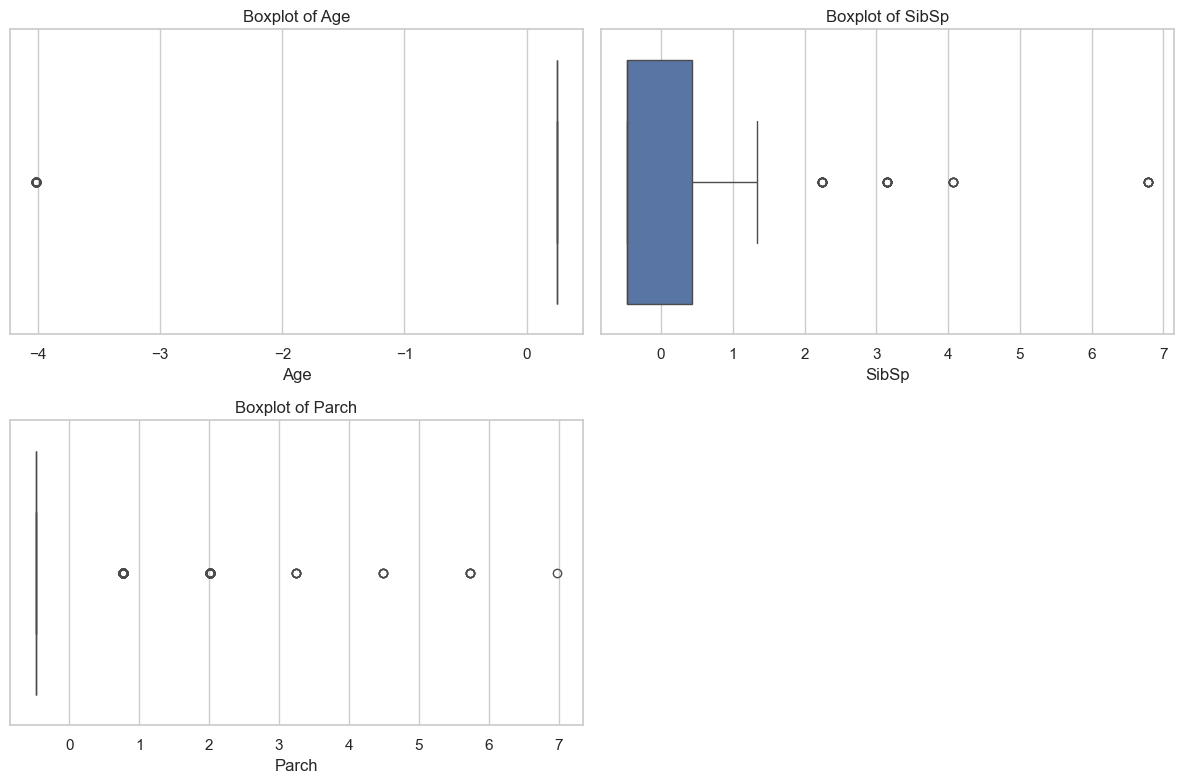

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
num_features = ["Age", "SibSp", "Parch"]


plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
